<a href="https://colab.research.google.com/github/Ahiru8B/ml-hw/blob/main/4_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Графовые алгоритмы

Граф - это структура, которая отображает данные в виде *вершин* и *ребер*. Граф может быть представлени в виде **aGraph = (V, E)** , где **V** - набор вершин, а **E** - ребро между ними. Ребро соединяет две вершины и таким образом отображает связь между ними.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

## Поиск в ширину

Алгоритм **BFS (breadth-first search)** начинает с корневой вершины и исследует вершины в окрестности. Затем он преходит на следующий уровень окрестности и повторяет процесс.

In [3]:
def bfs(graph, start):
    visited = []
    queue = [start]

    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            neighbours = graph[node]
            for neighbour in neighbours:
                queue.append(neighbour)
    return visited

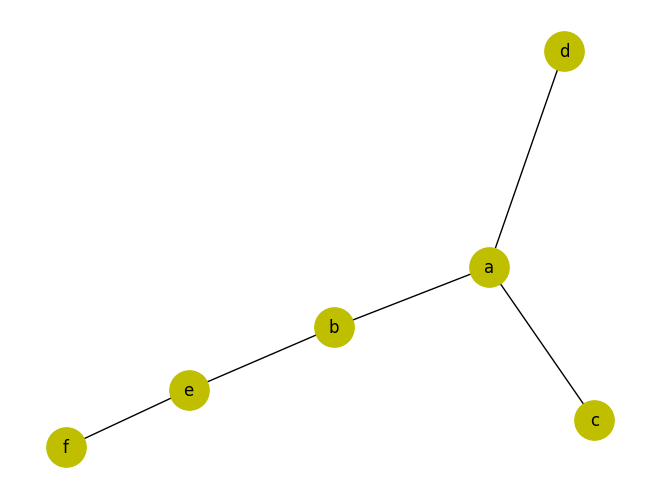

In [4]:
vertices = ('a', 'b', 'c', 'd', 'e', 'f')
edges = [('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'e'), ('b', 'a'),
         ('e', 'b'), ('e', 'f'), ('f', 'e'), ('c', 'a')]

G = nx.Graph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)

nx.draw(G,
        pos=nx.spring_layout(G),
        with_labels=True,
        node_color='y',
        node_size=800)

In [5]:
bfs(G, 'a')

['a', 'b', 'c', 'd', 'e', 'f']

## Поиск в глубину

Алгоритм **DFS (depth-first search)** - это альтернатива BFS, используемая для поиска данных в графе. DFS отличается от BFS тем, что после запуска из корневой вершины алгоритм проходит как можно дальше по каждому из уникальных путей, перебирая их одина за другим.

Логика алгоритма следующая:

- Как только он успешно достигает конечной глубины каждого пути, он помечает флагом все вершины на этом пути как посещенные. После завершения пути алгоритм возвращается назад.
- Если он может найти еще один уникальный путь от корневого узла, процесс повторяется.
- Алгоритм продолжает двигаться по новым ветвям до тех пор, пока все ветви не будут посещены.

In [6]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start)
    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited

In [7]:
graph = {'a': set(['b','c','d']),
         'b': set(['e','a']),
         'c': set(['a']),
         'd': set(['a']),
         'e': set(['b','f']),
         'f': set(['e']),
         }

dfs(graph, start='a')

a
b
e
f
c
d


{'a', 'b', 'c', 'd', 'e', 'f'}

## Задание (2 балла) + 4 б

Создать и нарисовать произвольный граф двумя описанными выше способами, и реальзовать для него алгоритмы BFS и DFS

['a', 'b', 'e', 'c', 'd']
a
b
c
d
e
{'e', 'd', 'b', 'c', 'a'}


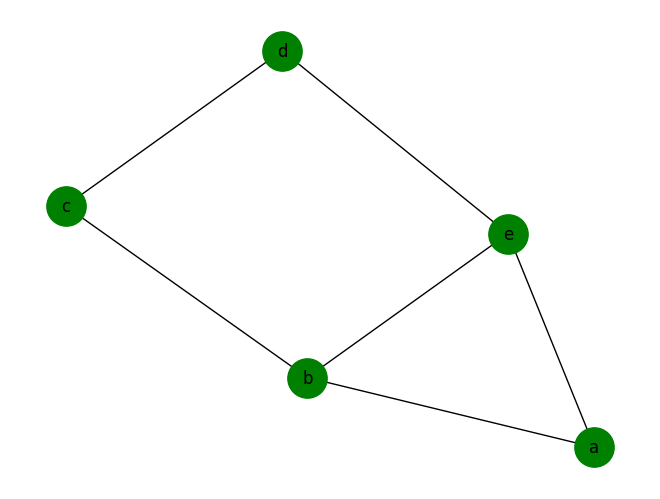

In [27]:
#решение
def converter(edges):
  mapGraph = {}
  for pair in edges:
    if pair[0] not in mapGraph:
      mapGraph[pair[0]] = set()
    mapGraph[pair[0]].add(pair[1])
  return mapGraph

nodes = {"a", "b", "c", "d", "e"}
edges = {("a", "b"), ("b", "c"), ("c", "d"), ("d", "e"), ("e", "a"), ("e", "b")}

newGraph = nx.Graph()
newGraph.add_nodes_from(nodes)
newGraph.add_edges_from(edges)
nx.draw(newGraph,
        pos=nx.spring_layout(newGraph),
        with_labels=True,
        node_color='green',
        node_size=800)


print(bfs(newGraph, "a"))
print(dfs(converter(edges), "a"))